<a href="https://colab.research.google.com/github/Adithyan773/Google-colab-models/blob/main/cats%20and%20dog%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
!pip install pathlib

In [ ]:
import numpy as np
import opendatasets as od
import pandas as pd
import tensorflow as tf
import polars as pl
import pathlib
from pathlib import Path

In [ ]:
df = od.download('www.kaggle.com/datasets/tongpython/cat-and-dog/croissant/download')

Skipping, found downloaded files in "./cat-and-dog" (use force=True to force download)


In [ ]:
train = '/content/cat-and-dog/training_set/training_set'
train  = Path(train)
test ='/content/cat-and-dog/test_set/test_set'
test = Path(test)

In [ ]:
animal ={
    'dog':list(train.glob('dogs/*.*')),
    'cat':list(train.glob('cats/*.*'))
}

labels ={
    'dog':1,
    'cat':0
}


In [ ]:
image_path=[]
image_label=[]

for name,images in animal.items():
  for image in images:
    image_path.append(str(image))
    image_label.append(labels[name])

image_path=np.array(image_path)
image_label=np.array(image_label)



In [ ]:
import cv2
X=[]

for image in image_path:
  img = cv2.imread(image)
  img_resize = cv2.resize(img,(28,28))
  X.append(img_resize)
X=np.array(X)
X=X/255.0
Y=np.array(image_label)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2) # Assuming you have 2 classes
y_test = to_categorical(y_test, num_classes=2)

In [ ]:
x_train.shape

(6404, 28, 28, 3)

In [ ]:
y_train.shape

(6404, 2)

In [ ]:
y_test.shape

(1601, 2)

In [ ]:
x_test.shape

(1601, 28, 28, 3)

In [ ]:
from keras import regularizers
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,3)),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),



    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
     tf.keras.layers.Dropout(0.5),



    tf.keras.layers.Dense(2,activation='softmax',kernel_regularizer=regularizers.l2(0.01))




])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905,474 (3.45 MB)

 Trainable params: 905,026 (3.45 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.5190 - loss: 4.1338 - val_accuracy: 0.4884 - val_loss: 2.4855
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.5625 - loss: 1.9171 - val_accuracy: 0.5303 - val_loss: 1.6683
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 107ms/step - accuracy: 0.6230 - loss: 1.1980 - val_accuracy: 0.5459 - val_loss: 1.2067
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.6823 - loss: 1.0032 - val_accuracy: 0.6490 - val_loss: 0.9532
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step - accuracy: 0.7465 - loss: 0.8511 - val_accuracy: 0.6871 - val_loss: 0.8694
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.7839 - loss: 0.7483 - val_accuracy: 0.6615 - val_loss: 0.9402
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 97ms/step - accuracy: 0.8004 - loss: 0.6990 - val_accuracy: 0.7295 - val_loss: 0.8137
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 22s 105ms/step - accuracy: 0.8410 - loss: 0.6605

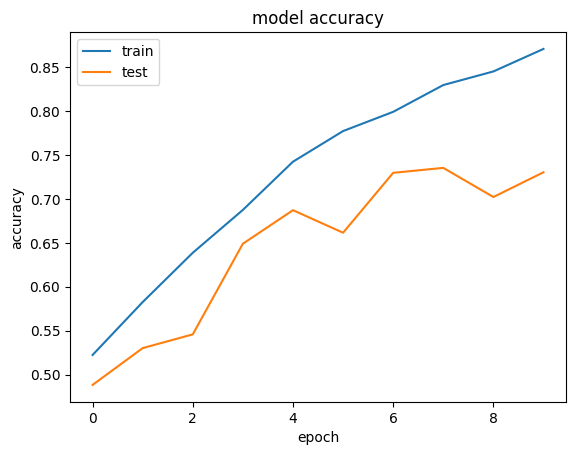

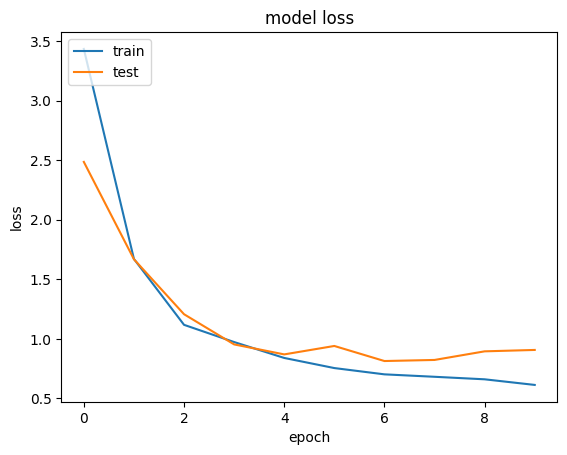

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7315 - loss: 0.9023


[0.9067484736442566, 0.7301686406135559]

In [ ]:
from sklearn.metrics import classification_report
prediction = model.predict(x_test)
prediction_label = np.argmax(prediction,axis=1)
Y_test = np.argmax(y_test,axis=1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


In [ ]:
print(classification_report(Y_test,prediction_label,target_names=["Cats","Dogs"]))

              precision    recall  f1-score   support

        Cats       0.70      0.79      0.74       781
        Dogs       0.77      0.67      0.72       820

    accuracy                           0.73      1601
   macro avg       0.73      0.73      0.73      1601
weighted avg       0.73      0.73      0.73      1601

